In [1]:
import nbsetup as nb
import ensemblepy as ep
import numpy as np
from simulations.wealth.series import series

# Disordered complexity

First looking at the standard boltzmann wealth model. We can see that the complexity starts low, as all agents start in the same state. Then even as the distribution tends to the "disorder" of higher entropy, the complexity remains low at 0.06.

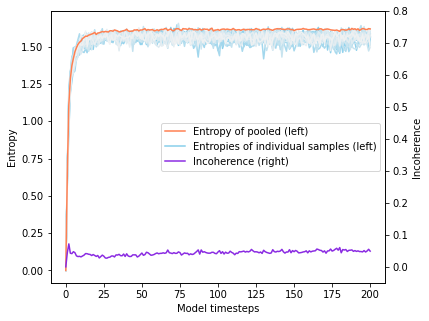

In [2]:
standard = series()

As we adjust the model slightly, so that agents no longer transfer 1 absolute unit and instead transfer a huge 80% of their wealth, we see the complexity increases to around 0.08. However, this value is still relatively small (anything under 0.1 is considered small) and this higher complexity is likely due to the fact that the range of possible values is much higher (maximum wealth is now ~120 vs ~45 previously).

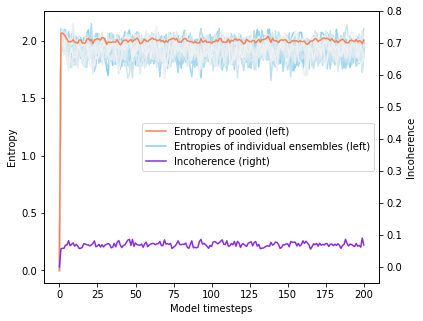

In [2]:
eighty = series(percent=0.8)

# Ordered complexity

Now we introduce a complex behaviour where the system "has memory". Where it has a random chance (_p_) of transfering it's wealth to an agent it has previously given to, vs (_1-p_) to a new agent. Where _p_ is (_count of agents it's already given to_)/(_count of all agents_). So obviously this effect decreases over time as it gives to new agents.

This effect is an incredibly simply mechanism to simulate how milk and coffee mix in a coffee cup. Where the particles are not moving around entirely randomly, instead how they move is dependant on fluid dynamics. That is, they're dependant on their nearby neighbours initially, but becomes less so over time as the whole thing mixes.

What we see below is while this "complex" behaviour (i.e. having memory and dependancy on neighbours or past actions) spikes for the initial mixing period but levels off back to the high entropy, disordered state by the end.

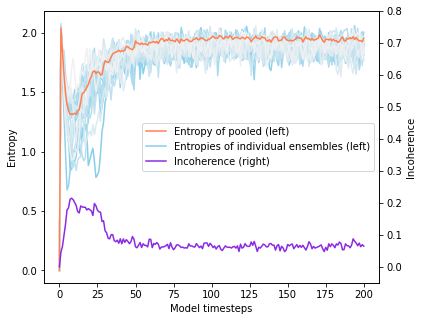

In [4]:
complex_one = series(percent=0.8, threshold=1.0)

Threshold is a metric which adjusts _p_ so the complex effect is increased and extended. Here we see the complexity is allowed to grow to a much higher level.

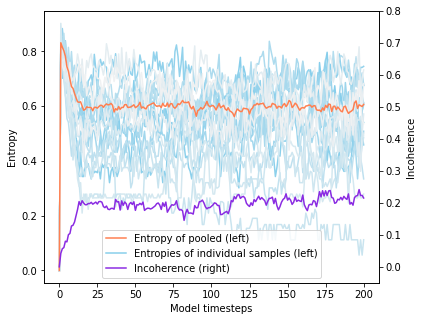

In [3]:
complex_five = series(percent=0.8, threshold=95.0, plot_params={'legend_loc':0})

While if you increase the threshold so much so that the complex behaviour is persisted, we see the ergodic complexity in this case also persist.

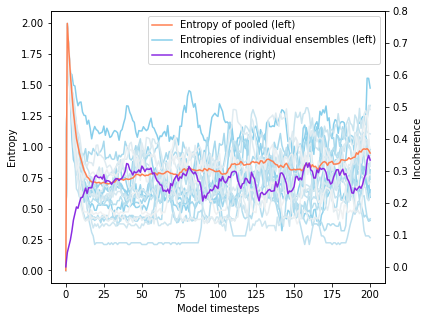

In [6]:
complex_hundred = series(percent=0.8, threshold=100.0, plot_params={'legend_loc':0})

## Initial entropy spike

This can be explained because unlike a coffee cup, all the agents begin mixing at once. We can simulate a more progressive spread by giving just a few initial agents the wealth. Making the initial distribution bimodal.

In [8]:
few = [np.hstack([np.ones(5), np.zeros(95)]) for _ in range(20)]

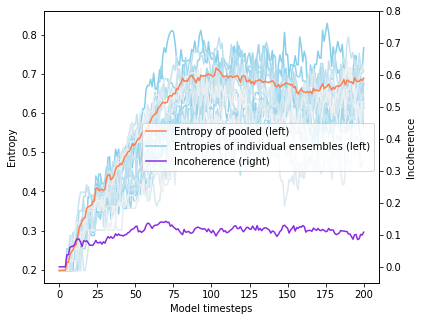

In [9]:
complex_few = series(threshold=1.0, initial=few)

When you do this for a non-complex system, it increases the initial entropy as it's now bi-modal. But it also increases the complexity slightly, as similar to 4.2. there are many more paths to the highest entropy state from the bi-modal distribution.

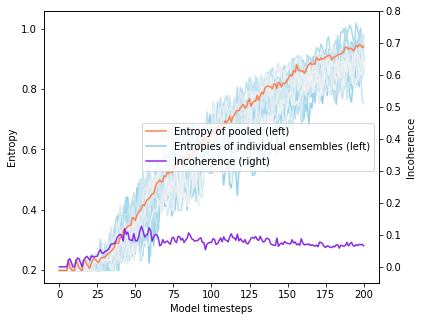

In [10]:
non_complex_few = series(initial=few)

## Figures for paper

In [4]:
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


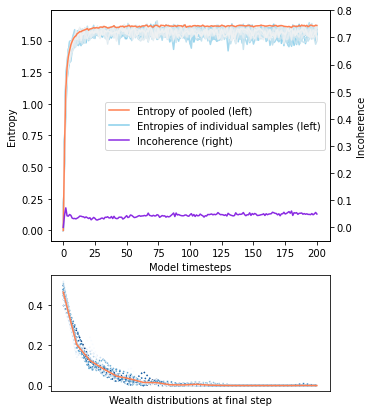

In [5]:
model = standard
fig, (top, bottom) = plt.subplots(2, 1, figsize=(5, 7), gridspec_kw={'height_ratios': [2, 1]})
ep.plot_series(model[0], model[1], ax=top)
ep.plot_discrete(model[1][-1], ax=bottom, xlabel='Wealth distributions at final step')
fig.savefig('figures/wealth-standard.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


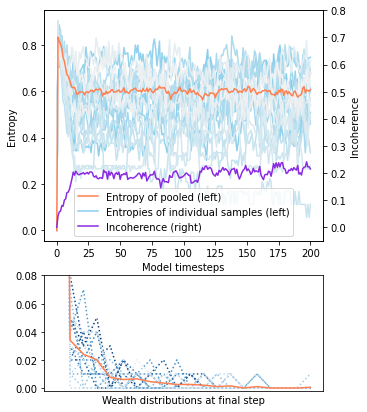

In [6]:
model = complex_five
fig, (top, bottom) = plt.subplots(2, 1, figsize=(5, 7), gridspec_kw={'height_ratios': [2, 1]})
ep.plot_series(model[0], model[1], ax=top, legend_loc=0)
ep.plot_discrete(model[1][-1], ax=bottom, xlabel='Wealth distributions at final step', ylim=(-0.002, 0.08))
fig.savefig('figures/wealth-complex.eps')